# <center>Outreachy Data Science 2019</center>

## <center>- Initial Contribution -</center>

<div align="right">Contributor: <b>Fernando Culell</b></div>

### Exploratoy Data Analysis

<br>
<br>
<p>As an initial aproximation to the data, we can explore the data description file that accompanies the dataset. There we find a detailed explanation of each feature present in the dataset. At first glance, we can see a considerable amount of features, wich are mostly categorical variables. The data in this dataset is related to real estate sales.</p>
<p>Wich features will be the most important to establish a sale price? A preliminary hypothesis is that features that points to location, size, material quality and general conditions are the ones that matter. Let's do some data exploration to test this hypothesis.</p>
<p>First, let's import Pandas library to obtain numeric information about the dataset. It will be useful to make data manipulation and transformation too, if needed. Also, we need to import Matplotlib and Seaborn libraries in order to obtain nice and functional data visualizations.</p>
<br>
<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Change the default color palette
sns.set_palette("Blues_d")


# Load the dataset and show its shape and head rows
df = pd.read_csv('dataset.csv')
print('Dataset Shape:\n Rows: ' + str(df.shape[0]) + '  Columns: ' + str(df.shape[1]))
df.head()

Dataset Shape:
 Rows: 1460  Columns: 81


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<br>
<br>
<p>We have 1460 rows, i.e. 1460 cases, and 81 columns, i.e. 78 independent variables, excluding the index and 'id' columns and the target feature column ('SalePrice'). We can see the presence of null values. Let's obtain a little more information about the values in each column.</p>
<br>
<br>

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

<br>
<br>
<p>We can present this info in graphic mode for better visualization.</p>
<br>
<br>

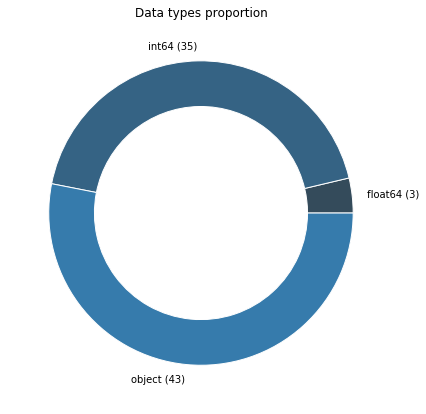

In [3]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(df.get_dtype_counts(), 
       labels=['float64 (3)', 'int64 (35)', 'object (43)'], 
       wedgeprops=dict(width=0.3, edgecolor='w'))
ax.set_title('Data types proportion');

<br>
<br>
<p>As we had observed at first glance, at least more than half of the features are categorical variables (43 object dtypes). But there are more, because some numeric features are categorical variables too, for example 'MSSubClass'.</p>
<p>Other thing we can observe in the DataFrame info output is the presence of several null values. If we look in detail the data description file, in some cases these null values are not missing values. They are indicating the absence of some feature, that is they are carrying information. So we can't ignore them. In these cases, we'll need to impute the null values.</p>
<p>An interesting practice is to visualize the pattern of occurrence of missing values. It can provide some useful insight in many cases. Let's do it.</p>
<br>
<br>

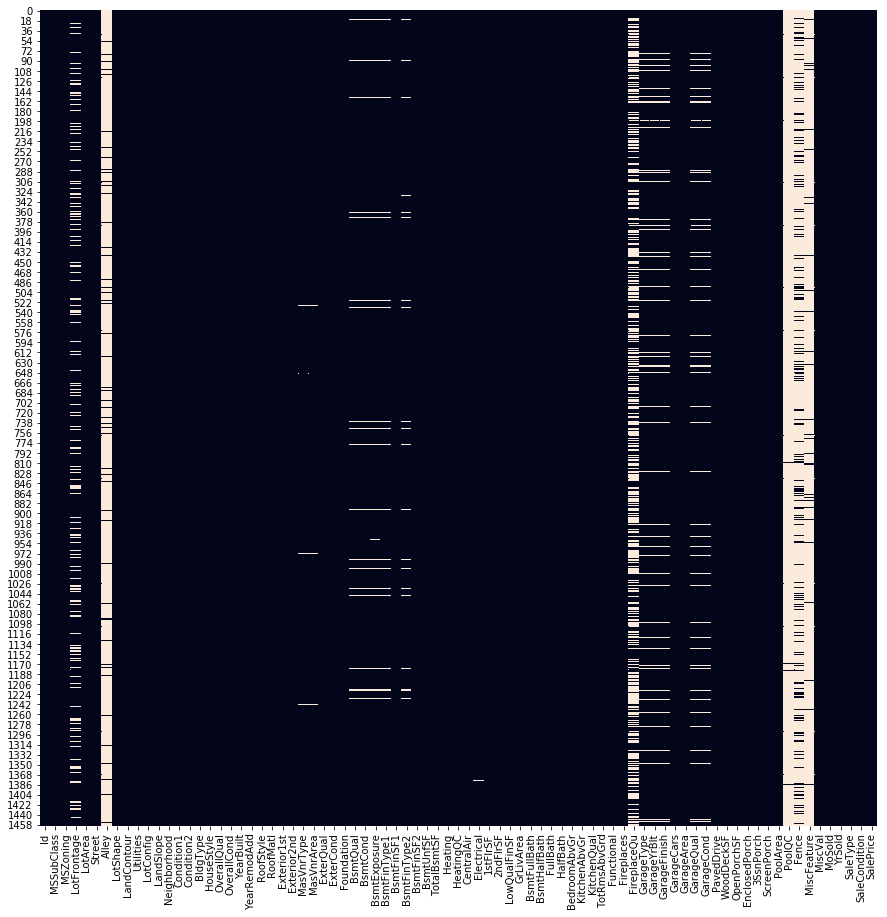

In [4]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.isnull(), cbar=False);

<br>
<br>
<p>In the plot above we can observe clearly the presence of some fields with too much null values: 'MiscFeature', 'Fence', 'PoolQC' and 'Alley'. In these cases is not worth imputing null values, we can treat them as missing values. It is better to ignore these features. 'LotFrontage' and 'FireplaceQu' have a lot of null values too, but in both cases the amount of non-null values is above 50%. We will need to evaluate if they are useful or not later.</p>
<p>Beyond imputing null values, another thing that we can do is to transform object type ordinal variables into numeric ones. It will allow to use them to compute correlations in order to evaluate them incidence in sales prices. This could be applied to: 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual' and 'GarageCond'.</p>
<br>
<br>

### Making some transformations and continuing exploration

<br>
<br>
<p>In the first place, we will do zero-imputation to the null values in the columns that we want to transform into numeric variables later. To achieve this we will use <i>fillna()</i> method from <i>Pandas</i> library. Note that 'KitchenQual' has not null values, so we will not include it.</p>
<br>
<br>

In [5]:
# Build a list with the selected columns
ordinal_col = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'FireplaceQu', 'GarageQual', 'GarageCond']

# Run the method
df[ordinal_col] = df[ordinal_col].fillna(0)

# Show the result
df[ordinal_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
ExterQual      1460 non-null object
ExterCond      1460 non-null object
BsmtQual       1460 non-null object
BsmtCond       1460 non-null object
HeatingQC      1460 non-null object
FireplaceQu    1460 non-null object
GarageQual     1460 non-null object
GarageCond     1460 non-null object
dtypes: object(8)
memory usage: 91.3+ KB


<br>
<br>
<p>Now that all values are filled in these columns, we will transform them into numeric variables in order to compute correaltions. We can use the data description file to know the values to replace. There we see that all the data in these fields use the same string ordinal scale. We will build a hard coded dictionary to map values in the replacement process.</p>
<br>
<br>

In [6]:
# Here we use the replace() method to transform values
# Assign a numeric ordinal scale to the string ordinal scale
df[ordinal_col] = df[ordinal_col].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

# Show the result
df[ordinal_col].head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,FireplaceQu,GarageQual,GarageCond
0,4,3,4,3,5,0,3,3
1,3,3,4,3,5,3,3,3
2,4,3,4,3,5,3,3,3
3,3,3,3,4,4,4,3,3
4,4,3,4,3,5,3,3,3


In [7]:
# This is to confirm the conservation of dataframe shape
df.shape

(1460, 81)

<br>
<br>
<p>Let's plot some graphics to try to visualize patterns and correlations between features in the dataset.</p>
<p>First, we will plot a Heatmap graphic to observe correlations between numeric variables. For the task we are undertaking, we have to focus on the correlations between the dependent variable 'SalePrice' and the rest of variables, the independent ones. Note that correlation only computes numerical variables.</p>
<br>
<br>

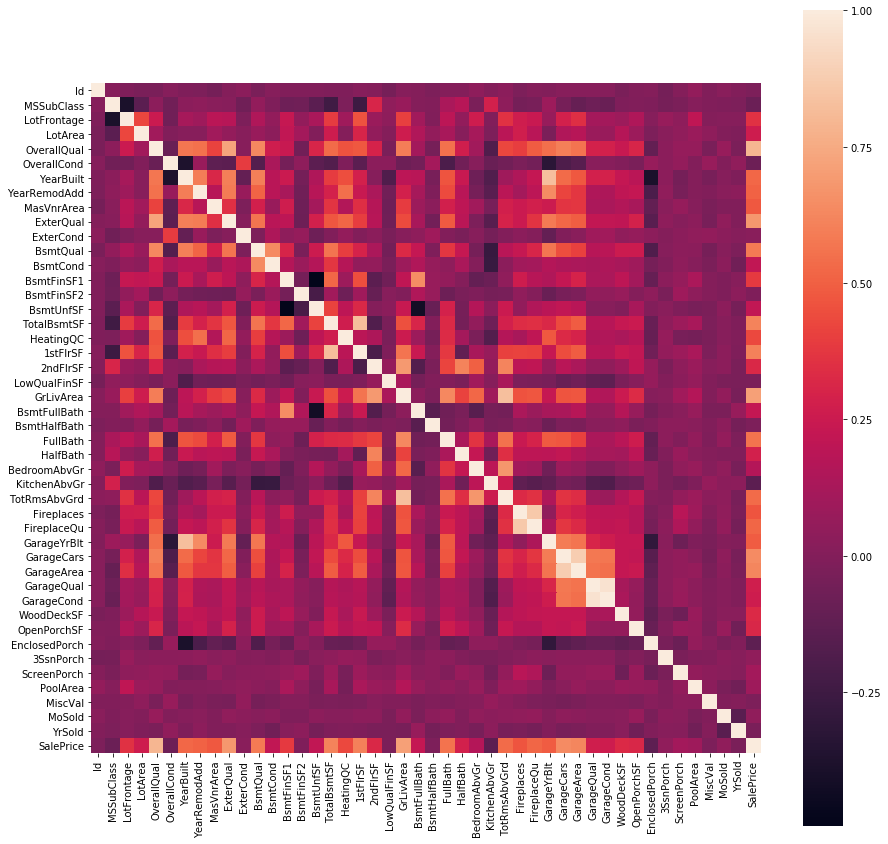

In [8]:
#First we compute correlations
corr = df.corr()

#Then we plot the Heatmap
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, square=True);

<br>
<br>
<p>The analysis of the heatmap is very revealing. First, because we can see right now that 'OverallQual' (that rates the overall material and finish of the house) is a good candidate for best describe the 'SalePrice' field. Both fields are highly correlated. The second best match that we can see here is 'GrLivArea' (above grade living area square feet). This confirms, in part, our preliminary hypothesis.</p>
<p>Also, the heatmap lets us see positive and negative correlations between another features, like: 'GarageQual' and 'GarageCond', 'GarageCars' and 'GarageArea', 'BsmtFinSF1' and 'BsmtUnfSF', etc. This is very useful to avoid data redundancy when we want to build a predictive model.</p>
<p>Lets print the correlation values of the 10 features most highly correlated with 'SalePrice'.</p>
<br>
<br>

In [9]:
print(corr['SalePrice'].sort_values(ascending=False).head(10))

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
ExterQual      0.682639
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
BsmtQual       0.585207
FullBath       0.560664
Name: SalePrice, dtype: float64


<br>
<br>
<p>At this point, we could explore the correlation between certain nominal features and the dependent variable. We'll begin with 'Neighborhood' field to test the location-related part of our preliminary hypothesis. Let's look at the punctual correlations with a scatter plot.</p>
<br>
<br>

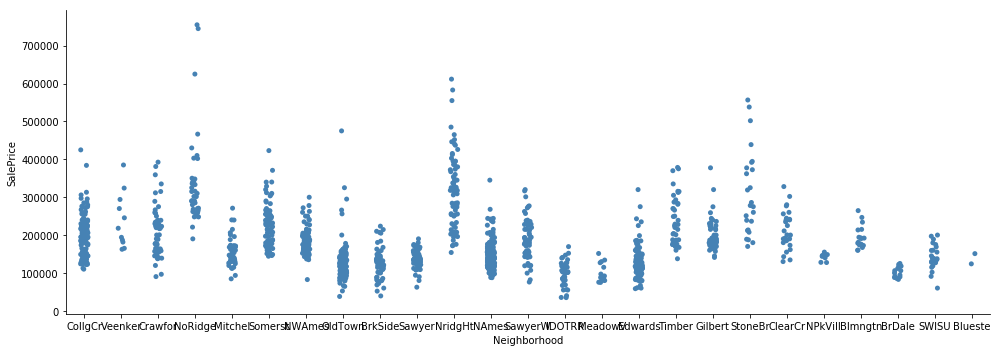

In [10]:
sns.catplot(x='Neighborhood' , y='SalePrice', data=df, aspect=2.8, color="steelblue");

<br>
<br>
<p>As it can be observed, there is some interesting pattern that could be pointing a correlation. Let's print a bar plot to appreciate it better.</p>
<br>
<br>

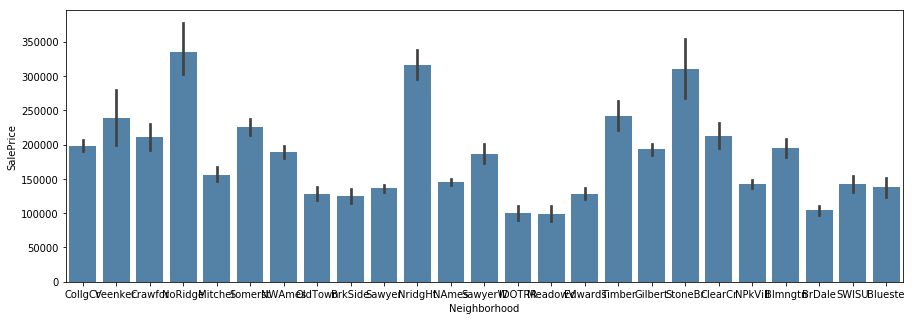

In [12]:
f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='Neighborhood' , y='SalePrice', data=df, color="steelblue");

<br>
<br>
<p>We can transform the nominal values of the 'Neighborhood' field into numeric values in order to compute its correlation with 'SalePrice'. As we can easily visualize an ordinal scale looking at the graph above, we will replace values mapping them via a hard coded dictionary. To do that, we'll print a list of the unique values and then we proceed to replace them.</p>
<br>
<br>

In [13]:
df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [14]:
# Create a replacement dictionary
replace_map = {'CollgCr': 17, 'Veenker': 21, 'Crawfor': 18, 'NoRidge': 25, 'Mitchel': 12,
               'Somerst': 20, 'NWAmes': 14, 'OldTown': 6, 'BrkSide': 4, 'Sawyer': 7, 'NridgHt': 24, 
               'NAmes': 11, 'SawyerW': 13, 'IDOTRR': 2, 'MeadowV': 1, 'Edwards': 5, 'Timber': 22, 
               'Gilbert': 15, 'StoneBr': 23, 'ClearCr': 19, 'NPkVill': 9, 'Blmngtn': 16, 'BrDale': 3, 
               'SWISU': 10, 'Blueste': 8}

# Replace values
df['Neighborhood'] = df['Neighborhood'].replace(replace_map)

# Show the changed values
df['Neighborhood'].unique()

array([17, 21, 18, 25, 12, 20, 14,  6,  4,  7, 24, 11, 13,  2,  1,  5, 22,
       15, 23, 19,  9, 16,  3, 10,  8])

<br>
<br>
<p>Now we have numerical values in 'Neighborhood' feature. Let's plot a bar chart again to appreciate the ordered pattern.</p>
<br>
<br>

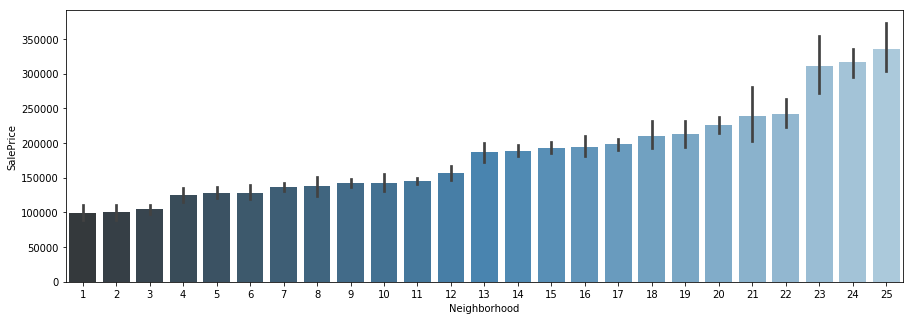

In [15]:
f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='Neighborhood' , y='SalePrice', data=df, palette="Blues_d");

<br>
<br>
<p>That looks good!  Let's compute the correlation to obtain a precise correlation value.</p>
<br>
<br>

In [16]:
df['Neighborhood'].corr(df['SalePrice'])

0.6967016907918047

<br>
<br>
<p>The correlation value between both fields is 0.6967. Nothing bad! It lies third in the list of most correlated features with respect to 'SalePrice'. Our preliminary hypothesis is corroborated.</p>
<p>OK, that's enough transformations for now. Later, we would perform more imputations and transformations in other features when we need it.</p>
<p>Finally, let's plot some additional graphs to see if there are more interesting patterns in another correlations between some other nominal variables and 'SalePrice'.</p>
<br>
<br>

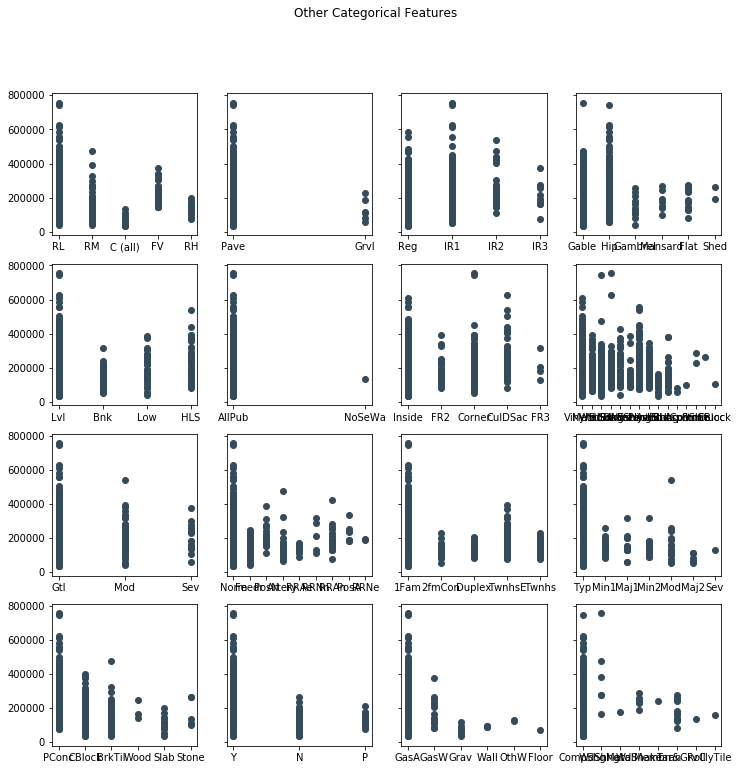

In [17]:
fig, axs = plt.subplots(4, 4, figsize=(12, 12), sharey=True)
axs[0][0].scatter(df['MSZoning'], df['SalePrice'])
axs[0][1].scatter(df['Street'], df['SalePrice'])
axs[0][2].scatter(df['LotShape'], df['SalePrice'])
axs[0][3].scatter(df['RoofStyle'], df['SalePrice'])
axs[1][0].scatter(df['LandContour'], df['SalePrice'])
axs[1][1].scatter(df['Utilities'], df['SalePrice'])
axs[1][2].scatter(df['LotConfig'], df['SalePrice'])
axs[1][3].scatter(df['Exterior1st'], df['SalePrice'])
axs[2][0].scatter(df['LandSlope'], df['SalePrice'])
axs[2][1].scatter(df['Condition1'], df['SalePrice'])
axs[2][2].scatter(df['BldgType'], df['SalePrice'])
axs[2][3].scatter(df['Functional'], df['SalePrice'])
axs[3][0].scatter(df['Foundation'], df['SalePrice'])
axs[3][1].scatter(df['PavedDrive'], df['SalePrice'])
axs[3][2].scatter(df['Heating'], df['SalePrice'])
axs[3][3].scatter(df['RoofMatl'], df['SalePrice'])
fig.suptitle('Other Categorical Features');

<br>
<br>
<p>At first glance, it seems not to be any relevant pattern. However, the incidence of these features in the dependent variable could be tested at a later stage. We have finished the data exploration for now.</p>
<br>
<br>

### Conclusion

<br>
<br>
<p>The primary task of this contribution is to answer the following questions: Which single field in 'datasets.csv' best describes the 'SalePrice' field? Why did you choose this field?</p>
<p>In response to that, if I have to choose only one, I choose the <b>'OverallQual'</b> field. I choose it mainly because it ranks the best in the computation of correlation. This means that if we train a simple linear regression model with this unique feature, it would be a decent sale price predictor. At least, it would achieve a better performance than any other unique feature. Also, and even though when it's secondary, this choice agrees with the common sense intuition. I know that common sense intuition can lead to catastrophic mistakes, but I think this time it worked.</p>
<p>Anyway, if we want to create an effective predictive model we would make use of a combination of selected features and not restrict ourselves to one feature as the only independent variable.</p>
<br>
<br>